<a href="https://colab.research.google.com/github/kavya-sree-chandhi/Youth-Smoking-and-Drug-Analysis-ML-Insights/blob/main/Youth_Smoking_and_Drug_Analysis_%26_ML_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Youth Smoking🚭 and Drug💊: Analysis & ML Insights**

## ***Imports and Setup***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## ***Load and Explore Dataset***

In [ ]:
# Load the dataset
file_path = "/content/youth_smoking_drug_data_.csv"
youth_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Original Data Before Cleaning:")
youth_data.head(8)

Original Data Before Cleaning:


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5.0,Yes,1.0,5.0,No,4,No,3,1
1,2024,14-Oct,Female,34.88,41.57,High,6.0,Yes,10.0,5.0,No,9,Yes,9,3
2,2021,NaN,Both,11.61,63.65,Low,NaN,Yes,NaN,NaN,Yes,5,NaN,2,6
3,2023,14-Oct,Both,42.00,56.80,High,6.0,Yes,2.0,7.0,Yes,2,No,5,1
4,2024,40-49,Both,33.75,42.90,Middle,10.0,No,9.0,7.0,Yes,2,No,10,9
5,2023,15-19,Male,47.90,39.62,High,1.0,No,2.0,4.0,Yes,4,No,10,3
6,2022,70-79,Male,20.14,47.29,High,10.0,Yes,7.0,4.0,No,4,No,4,2
7,2021,30-39,Female,38.38,26.60,Low,4.0,No,7.0,1.0,Yes,2,No,4,10


In [ ]:
# Display the columns in the dataset
youth_data.columns

Index(['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
       'Drug_Experimentation', 'Socioeconomic_Status', 'Peer_Influence',
       'School_Programs', 'Family_Background', 'Mental_Health',
       'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
       'Community_Support', 'Media_Influence'],
      dtype='object')

## ***Exploratory Data Analysis (EDA)***

## ***Missing and Duplicate Value Check (Data Cleaning)***

In [ ]:
# Check for missing values
missing_values = youth_data.isna().sum().sum()
print(f'Missing values: {missing_values}')

# Store the rows that will be deleted (rows with missing values)
deleted_rows = youth_data[youth_data.isna().any(axis=1)]

# Drop rows with missing values if any
if missing_values > 0:
    youth_data = youth_data.dropna(axis=0)
    print(f'Missing values were found and rows/columns were dropped.')
    print("\n")

# Check for duplicated values
duplicated_values = youth_data.duplicated().sum()
print(f'Duplicated values: {duplicated_values}')

# Store the rows that will be deleted (duplicated rows)
deleted_duplicates = youth_data[youth_data.duplicated()]

# Drop duplicated rows if any
if duplicated_values > 0:
    youth_data = youth_data.drop_duplicates()
    print(f'Duplicated rows were removed.')
    print("\n")

# Clean Age_Group column: Allow valid age ranges (like "15-19", "80+"), remove rows with completely invalid values
# Regex to match valid age groups: single age (e.g., '25'), age range (e.g., '15-19'), or age group '80+'
valid_age_pattern = r'^\d{1,2}(-\d{1,2})?$|^\d+\+$'  # Matches '15', '15-19', '80+'

# Identify rows with invalid Age_Group values
invalid_age_group = youth_data[~youth_data['Age_Group'].str.match(valid_age_pattern)]

# Display the invalid rows for review
print("Rows with Invalid Age Groups:")
display(invalid_age_group)

# Drop rows where Age_Group doesn't match the valid pattern
youth_data = youth_data[youth_data['Age_Group'].str.match(valid_age_pattern)]

print(f"Rows with invalid Age Groups have been removed. Now, the dataset has {youth_data.shape[0]} rows.")
print("\n")
print("\n")

# Show data after cleaning
print("Data After Cleaning (no missing, duplicated, or invalid Age Group values):")
display(youth_data)
print("\n")
print("\n")

# Show deleted rows (rows with missing values)
print("Deleted Rows (Rows with missing values):")
display(deleted_rows)
print("\n")
print("\n")

# Show deleted duplicate rows
print("Deleted Duplicate Rows:")
display(deleted_duplicates)
print("\n")
print("\n")

# Show invalid rows that were deleted due to Age Group not matching valid patterns
print("Invalid Rows (Deleted due to Age Group not matching valid patterns):")
display(invalid_age_group)
print("\n")
print("\n")


Missing values: 10
Missing values were found and rows/columns were dropped.


Duplicated values: 1
Duplicated rows were removed.


Rows with Invalid Age Groups:


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
1,2024,14-Oct,Female,34.88,41.57,High,6.0,Yes,10.0,5.0,No,9,Yes,9,3
3,2023,14-Oct,Both,42.00,56.80,High,6.0,Yes,2.0,7.0,Yes,2,No,5,1
8,2022,14-Oct,Female,7.87,54.67,Middle,5.0,Yes,9.0,2.0,No,4,No,4,2
28,2020,14-Oct,Both,14.80,69.46,Middle,3.0,No,6.0,10.0,Yes,8,No,8,8
56,2023,14-Oct,Both,11.23,48.93,Middle,2.0,Yes,9.0,2.0,No,5,Yes,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,2022,14-Oct,Male,42.97,39.34,High,10.0,Yes,10.0,1.0,Yes,9,Yes,2,2
9952,2020,14-Oct,Male,14.69,12.01,Middle,7.0,Yes,2.0,7.0,Yes,8,No,10,1
9968,2022,14-Oct,Both,42.50,32.63,Low,7.0,Yes,6.0,6.0,Yes,2,Yes,8,5
9972,2023,14-Oct,Female,37.67,31.36,High,1.0,Yes,2.0,7.0,Yes,9,No,6,9


Rows with invalid Age Groups have been removed. Now, the dataset has 8993 rows.




Data After Cleaning (no missing, duplicated, or invalid Age Group values):


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5.0,Yes,1.0,5.0,No,4,No,3,1
4,2024,40-49,Both,33.75,42.90,Middle,10.0,No,9.0,7.0,Yes,2,No,10,9
5,2023,15-19,Male,47.90,39.62,High,1.0,No,2.0,4.0,Yes,4,No,10,3
6,2022,70-79,Male,20.14,47.29,High,10.0,Yes,7.0,4.0,No,4,No,4,2
7,2021,30-39,Female,38.38,26.60,Low,4.0,No,7.0,1.0,Yes,2,No,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,2021,25-29,Male,6.95,64.31,Middle,6.0,Yes,9.0,1.0,Yes,4,Yes,1,7
9998,2023,15-19,Male,49.17,10.21,Low,7.0,Yes,4.0,5.0,No,7,Yes,2,9
9999,2020,80+,Female,48.00,30.85,Middle,8.0,Yes,8.0,8.0,No,4,Yes,8,9
10000,2021,25-29,Both,47.62,39.54,High,1.0,No,7.0,2.0,Yes,1,No,5,10






Deleted Rows (Rows with missing values):


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
2,2021,NaN,Both,11.61,63.65,Low,NaN,Yes,NaN,NaN,Yes,5,NaN,2,6
15,2021,NaN,Both,11.61,63.65,Low,NaN,Yes,NaN,NaN,Yes,5,NaN,2,6






Deleted Duplicate Rows:


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
180,2023,60-69,Both,36.28,59.03,Middle,3.0,Yes,7.0,8.0,Yes,1,No,5,2






Invalid Rows (Deleted due to Age Group not matching valid patterns):


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
1,2024,14-Oct,Female,34.88,41.57,High,6.0,Yes,10.0,5.0,No,9,Yes,9,3
3,2023,14-Oct,Both,42.00,56.80,High,6.0,Yes,2.0,7.0,Yes,2,No,5,1
8,2022,14-Oct,Female,7.87,54.67,Middle,5.0,Yes,9.0,2.0,No,4,No,4,2
28,2020,14-Oct,Both,14.80,69.46,Middle,3.0,No,6.0,10.0,Yes,8,No,8,8
56,2023,14-Oct,Both,11.23,48.93,Middle,2.0,Yes,9.0,2.0,No,5,Yes,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,2022,14-Oct,Male,42.97,39.34,High,10.0,Yes,10.0,1.0,Yes,9,Yes,2,2
9952,2020,14-Oct,Male,14.69,12.01,Middle,7.0,Yes,2.0,7.0,Yes,8,No,10,1
9968,2022,14-Oct,Both,42.50,32.63,Low,7.0,Yes,6.0,6.0,Yes,2,Yes,8,5
9972,2023,14-Oct,Female,37.67,31.36,High,1.0,Yes,2.0,7.0,Yes,9,No,6,9


In [ ]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = "/content/cleaned_youth_smoking_drug_data.csv"  # Adjust the file path as needed
youth_data.to_csv(cleaned_file_path, index=False)  # Save without the index column

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: /content/cleaned_youth_smoking_drug_data.csv


In [ ]:
# Display the Shape of the Dataset (Number of Rows and Columns)
print('dataset size:', youth_data.shape)

dataset size: (8993, 15)


In [ ]:
# Display Information About the DataFrame
print(youth_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8993 entries, 0 to 10001
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  8993 non-null   int64  
 1   Age_Group             8993 non-null   object 
 2   Gender                8993 non-null   object 
 3   Smoking_Prevalence    8993 non-null   float64
 4   Drug_Experimentation  8993 non-null   float64
 5   Socioeconomic_Status  8993 non-null   object 
 6   Peer_Influence        8993 non-null   float64
 7   School_Programs       8993 non-null   object 
 8   Family_Background     8993 non-null   float64
 9   Mental_Health         8993 non-null   float64
 10  Access_to_Counseling  8993 non-null   object 
 11  Parental_Supervision  8993 non-null   int64  
 12  Substance_Education   8993 non-null   object 
 13  Community_Support     8993 non-null   int64  
 14  Media_Influence       8993 non-null   int64  
dtypes: float64(5), int64(4), 

In [ ]:
# Display Summary Statistics for Numerical Columns in the Dataset
print(youth_data.describe().T)

                       count         mean        std      min      25%  \
Year                  8993.0  2022.000556   1.425453  2020.00  2021.00   
Smoking_Prevalence    8993.0    27.366689  12.990432     5.00    16.01   
Drug_Experimentation  8993.0    40.095032  17.553873    10.01    24.72   
Peer_Influence        8993.0     5.457912   2.864922     1.00     3.00   
Family_Background     8993.0     5.498499   2.861929     1.00     3.00   
Mental_Health         8993.0     5.467252   2.881686     1.00     3.00   
Parental_Supervision  8993.0     5.538864   2.895432     1.00     3.00   
Community_Support     8993.0     5.546981   2.878709     1.00     3.00   
Media_Influence       8993.0     5.495941   2.869649     1.00     3.00   

                          50%      75%      max  
Year                  2022.00  2023.00  2024.00  
Smoking_Prevalence      27.24    38.60    49.99  
Drug_Experimentation    40.10    55.46    69.99  
Peer_Influence           5.00     8.00    10.00  
Family_Ba

In [ ]:
# Display the number of unique values in each column of the dataset
youth_data.nunique()

,0
Year,5
Age_Group,9
Gender,3
Smoking_Prevalence,3851
Drug_Experimentation,4637
Socioeconomic_Status,3
Peer_Influence,10
School_Programs,2
Family_Background,10
Mental_Health,10


In [ ]:
# Identify and Print Numerical and Categorical Columns in the Dataset
numerical_columns = youth_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = youth_data.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)

Numerical Columns: ['Year', 'Smoking_Prevalence', 'Drug_Experimentation', 'Peer_Influence', 'Family_Background', 'Mental_Health', 'Parental_Supervision', 'Community_Support', 'Media_Influence']
Categorical Columns: ['Age_Group', 'Gender', 'Socioeconomic_Status', 'School_Programs', 'Access_to_Counseling', 'Substance_Education']


In [ ]:
# Get the unique values for each categorical column
for col in non_numerical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {youth_data[col].unique()}")
    print("\n")

Column: Age_Group
Unique Values: ['15-19' '40-49' '70-79' '30-39' '60-69' '50-59' '25-29' '80+' '20-24']


Column: Gender
Unique Values: ['Both' 'Male' 'Female']


Column: Socioeconomic_Status
Unique Values: ['High' 'Middle' 'Low']


Column: School_Programs
Unique Values: ['Yes' 'No']


Column: Access_to_Counseling
Unique Values: ['No' 'Yes']


Column: Substance_Education
Unique Values: ['No' 'Yes']




### **Univariate Analysis**

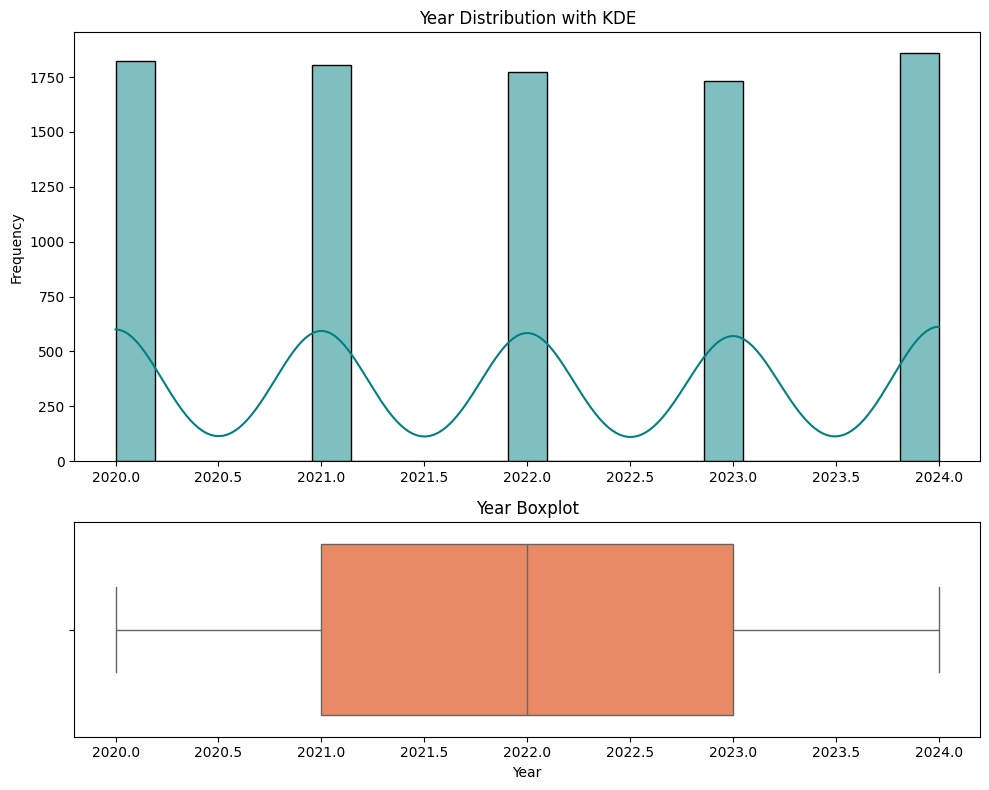


Summary Statistics for Year:
count    8993.000000
mean     2022.000556
std         1.425453
min      2020.000000
25%      2021.000000
50%      2022.000000
75%      2023.000000
max      2024.000000


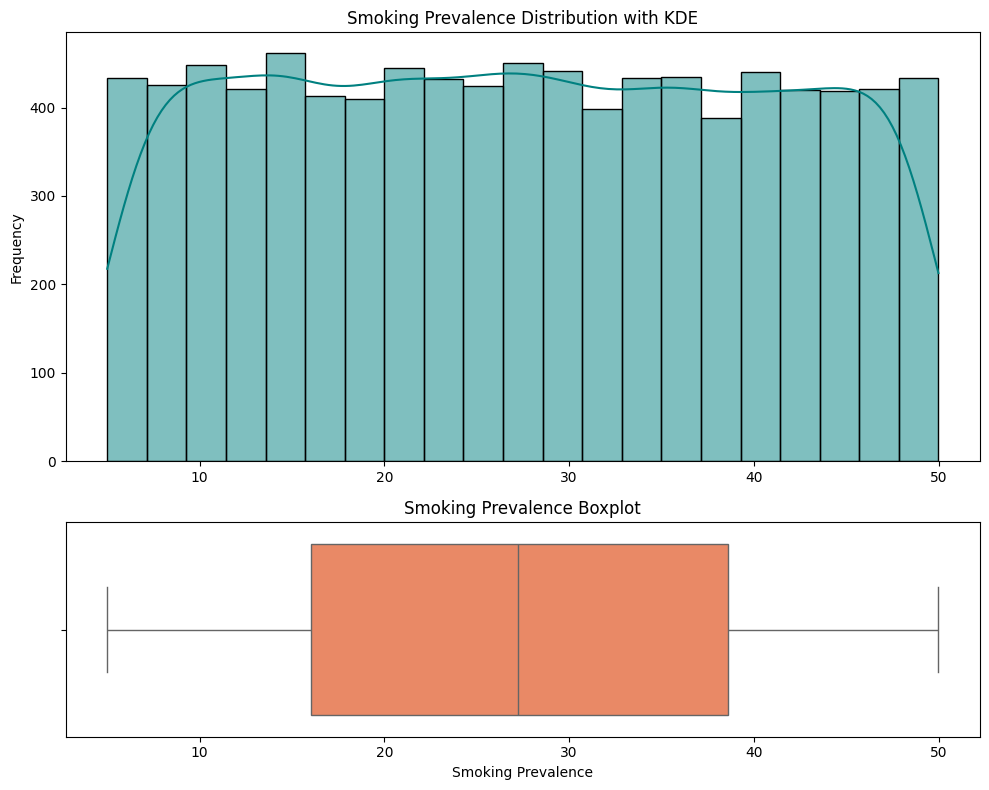


Summary Statistics for Smoking Prevalence:
count    8993.000000
mean       27.366689
std        12.990432
min         5.000000
25%        16.010000
50%        27.240000
75%        38.600000
max        49.990000


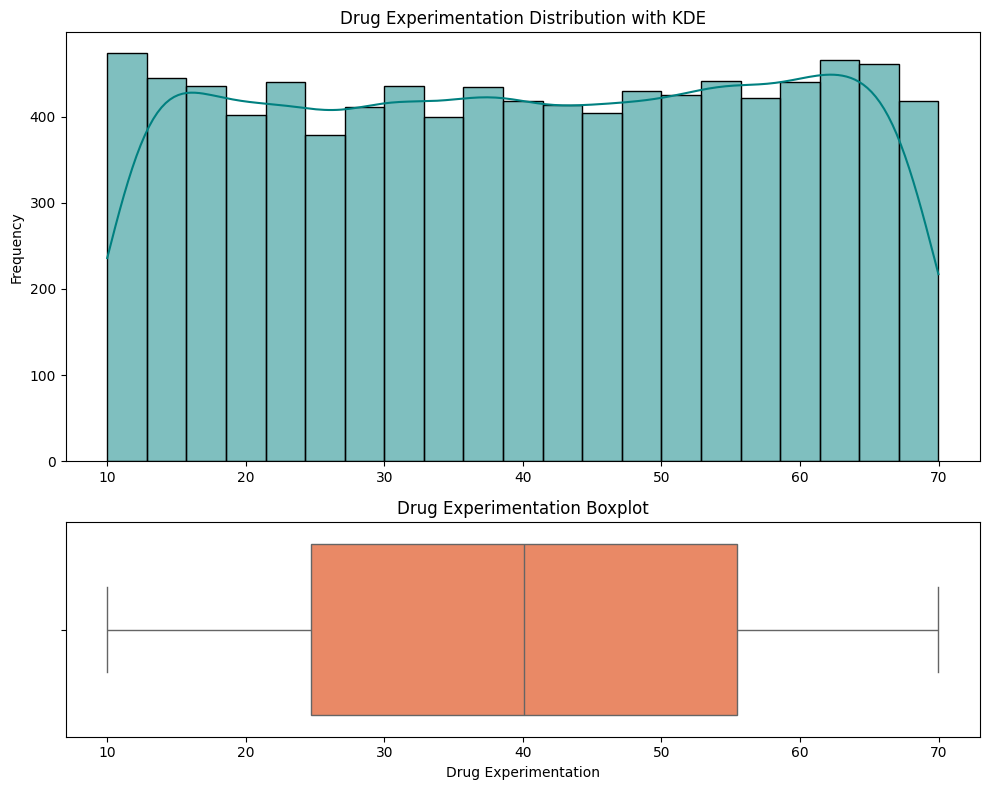


Summary Statistics for Drug Experimentation:
count    8993.000000
mean       40.095032
std        17.553873
min        10.010000
25%        24.720000
50%        40.100000
75%        55.460000
max        69.990000


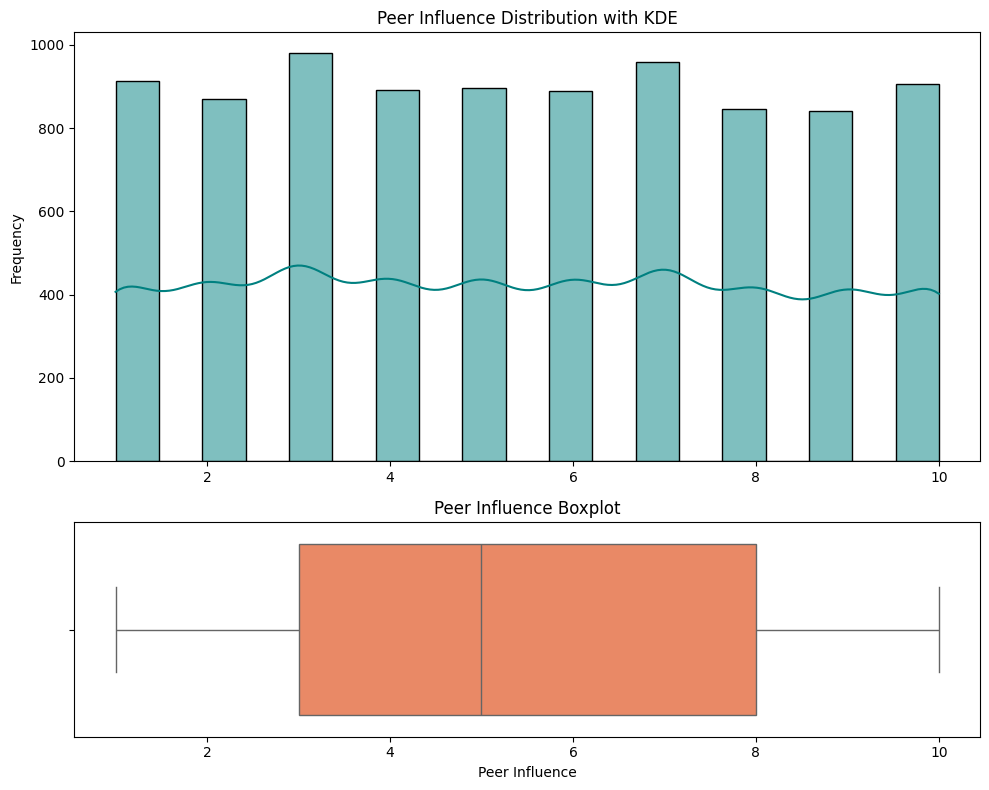


Summary Statistics for Peer Influence:
count    8993.000000
mean        5.457912
std         2.864922
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000


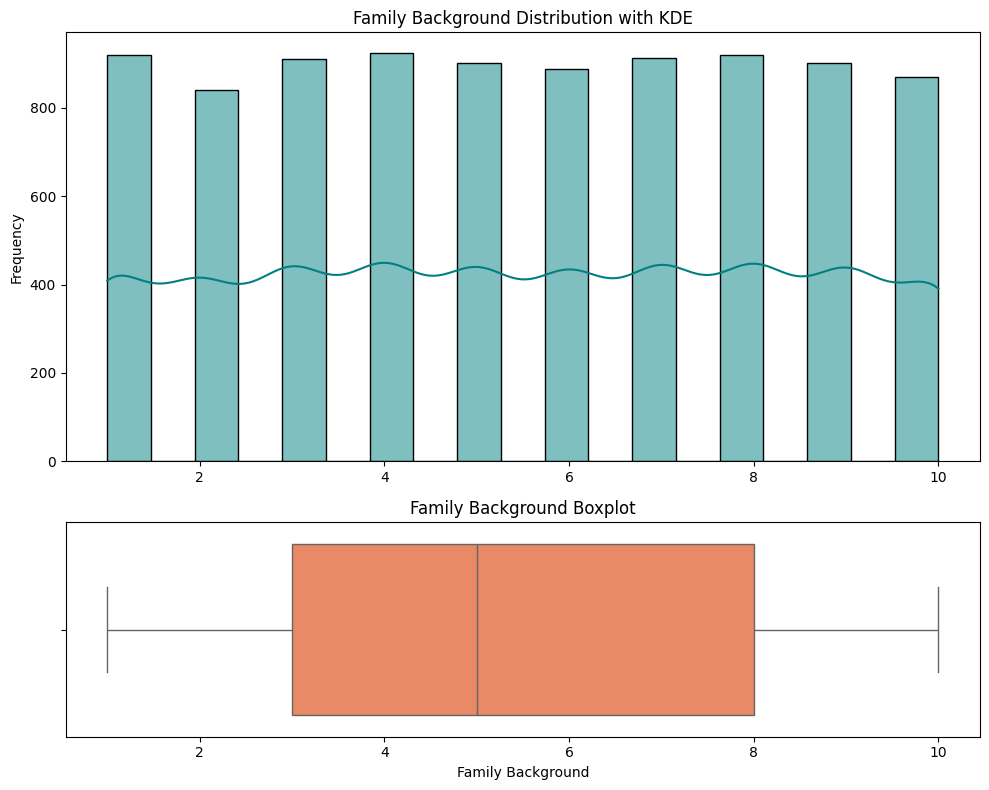


Summary Statistics for Family Background:
count    8993.000000
mean        5.498499
std         2.861929
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000


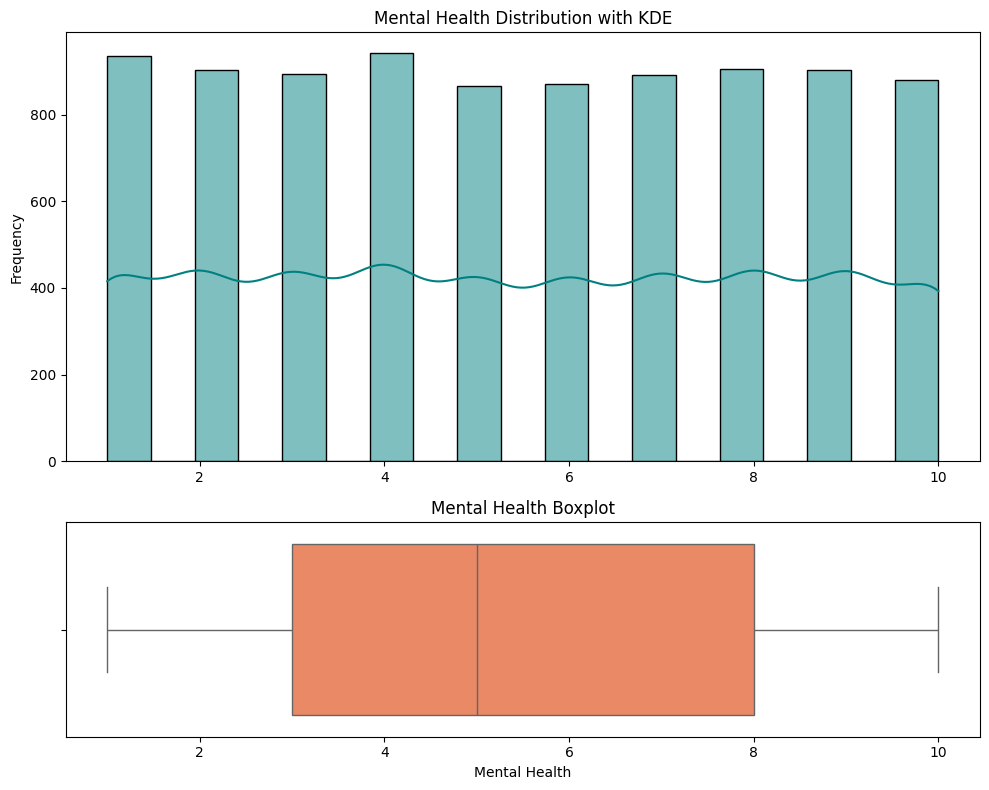


Summary Statistics for Mental Health:
count    8993.000000
mean        5.467252
std         2.881686
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000


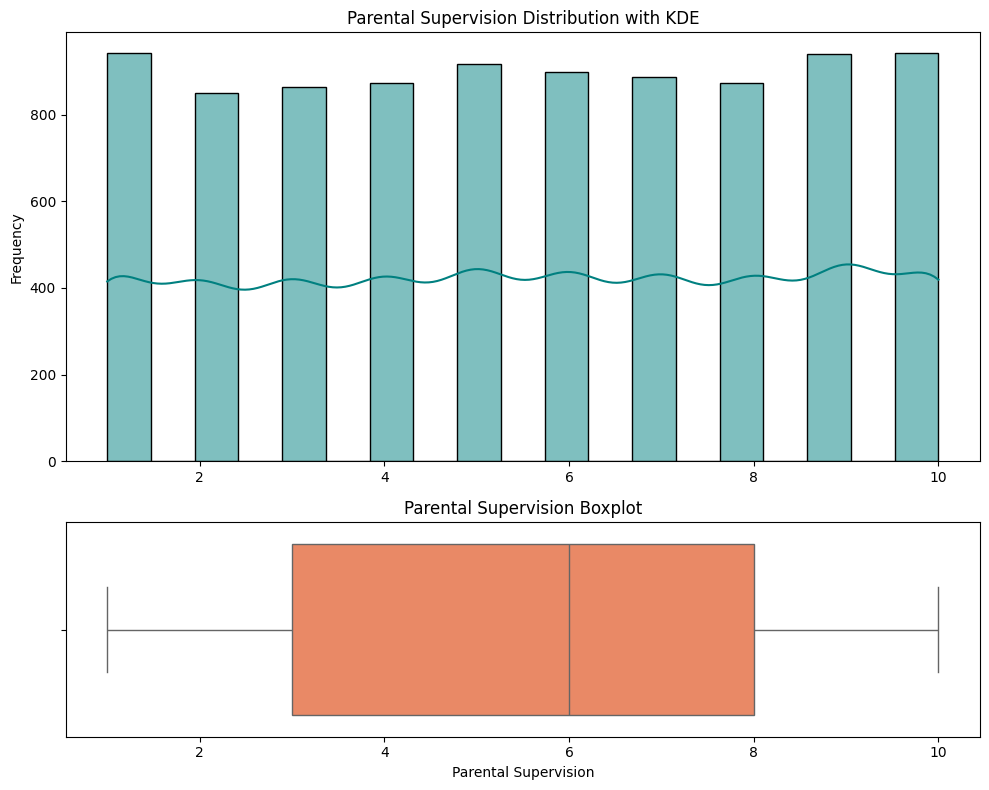


Summary Statistics for Parental Supervision:
count    8993.000000
mean        5.538864
std         2.895432
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000


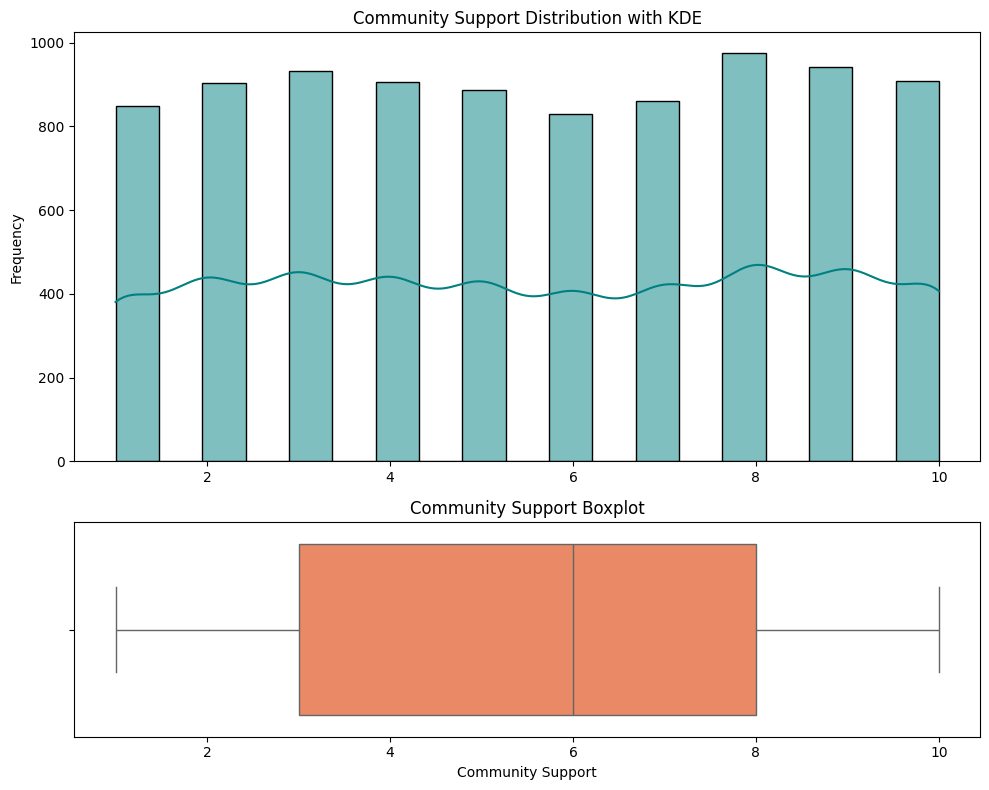


Summary Statistics for Community Support:
count    8993.000000
mean        5.546981
std         2.878709
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000


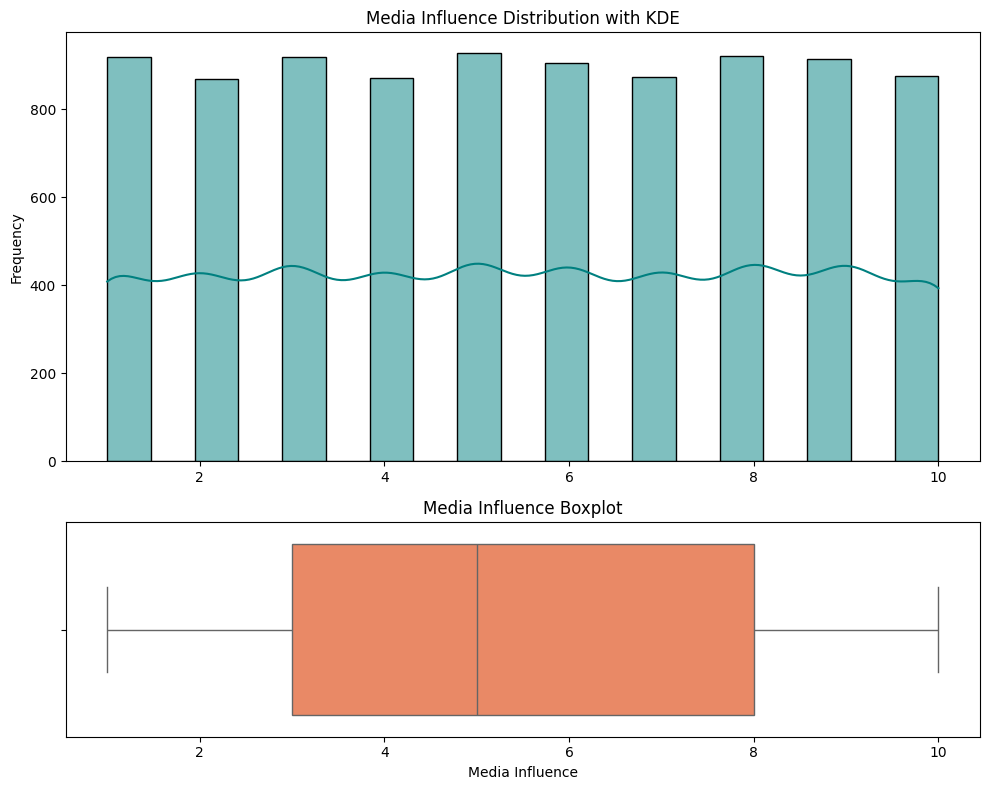


Summary Statistics for Media Influence:
count    8993.000000
mean        5.495941
std         2.869649
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000


In [ ]:
# Function for Univariate Analysis
def univariate_analysis(data, column, title):
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

    # Histogram with KDE
    sns.histplot(data[column], kde=True, ax=axes[0], color='teal')
    axes[0].set_title(f'{title} Distribution with KDE')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=data[column], ax=axes[1], color='coral')
    axes[1].set_title(f'{title} Boxplot')
    axes[1].set_xlabel(title.replace('_', ' '))
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

    # Summary Statistics
    stats = data[column].describe()
    print(f'\nSummary Statistics for {title}:\n{stats.to_string()}')

# List of columns to analyze
columns_to_analyze = [
    'Year', 'Smoking_Prevalence', 'Drug_Experimentation', 'Peer_Influence',
    'Family_Background', 'Mental_Health', 'Parental_Supervision',
    'Community_Support', 'Media_Influence'
]

# Apply the function to each column
for column in columns_to_analyze:
    univariate_analysis(youth_data, column, title=column.replace('_', ' '))


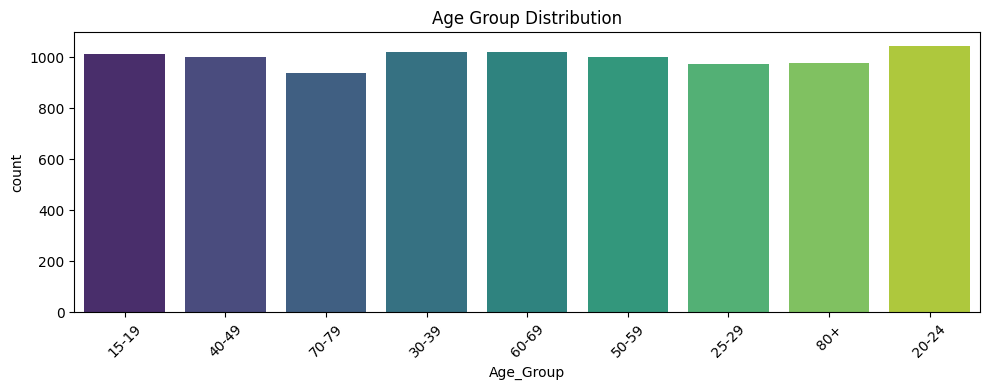


Percentage distribution for Age Group:
Age_Group
20-24    11.62
30-39    11.35
60-69    11.34
15-19    11.28
40-49    11.13
50-59    11.13
80+      10.89
25-29    10.83
70-79    10.43
Name: proportion, dtype: float64



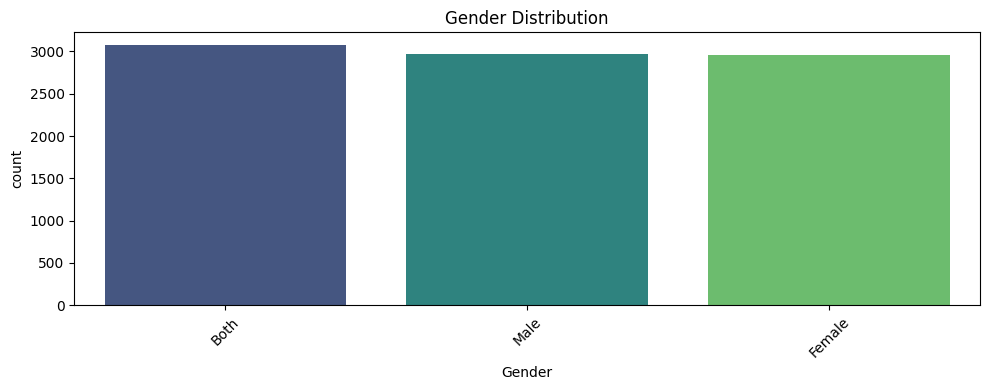


Percentage distribution for Gender:
Gender
Both      34.16
Male      32.99
Female    32.85
Name: proportion, dtype: float64



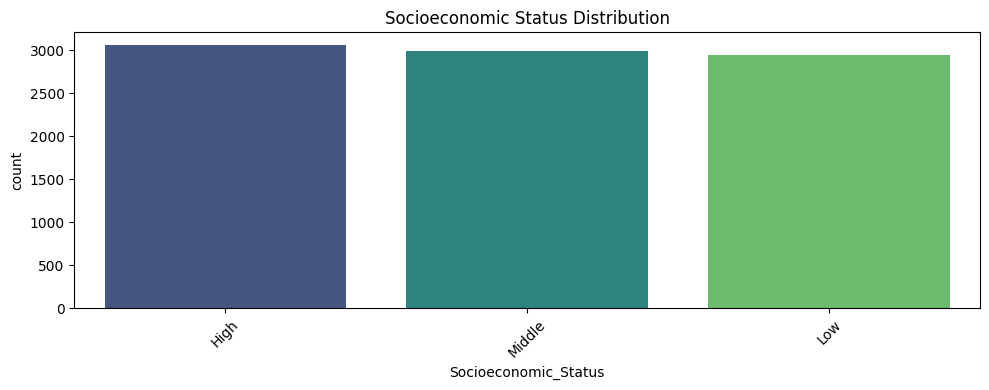


Percentage distribution for Socioeconomic Status:
Socioeconomic_Status
High      33.97
Middle    33.28
Low       32.75
Name: proportion, dtype: float64



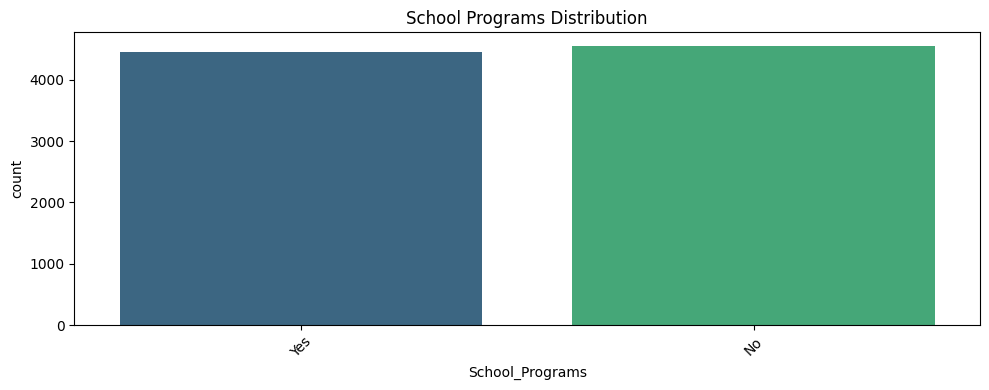


Percentage distribution for School Programs:
School_Programs
No     50.55
Yes    49.45
Name: proportion, dtype: float64



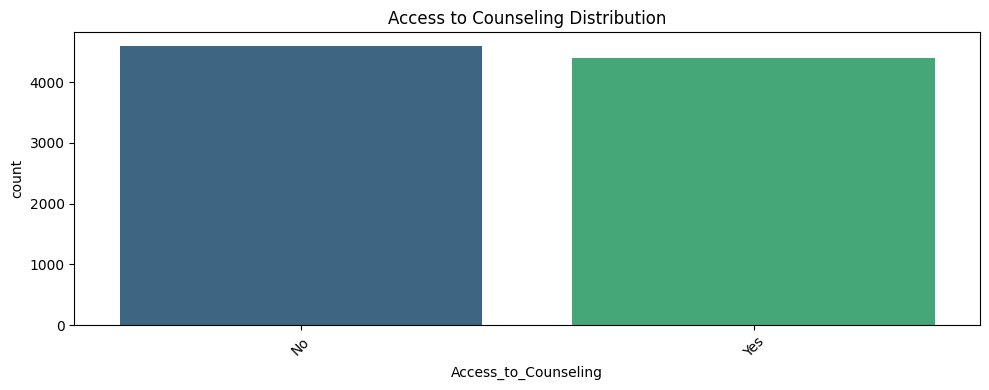


Percentage distribution for Access to Counseling:
Access_to_Counseling
No     51.03
Yes    48.97
Name: proportion, dtype: float64



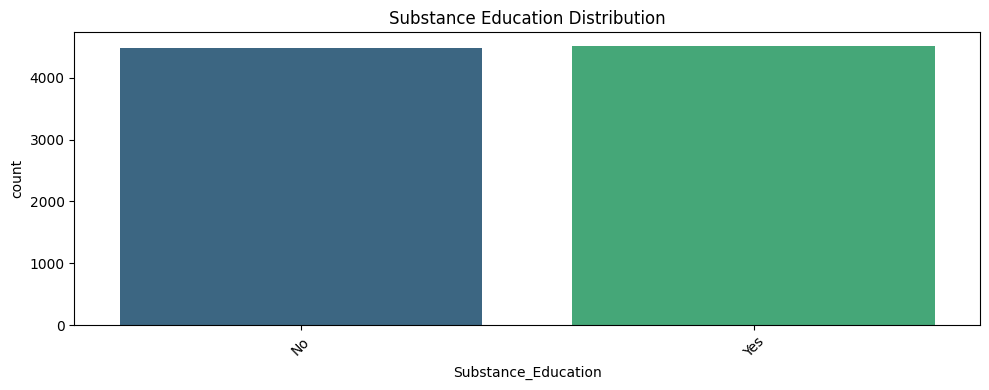


Percentage distribution for Substance Education:
Substance_Education
Yes    50.13
No     49.87
Name: proportion, dtype: float64



In [ ]:
# Function to perform univariate analysis for categorical columns
def univariate_categorical_analysis(data, column, title):
    plt.figure(figsize=(10, 4))

    sns.countplot(data=data, x=column, palette='viridis')
    plt.title(f'{title} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    percentage_dist = (data[column].value_counts(normalize=True) * 100).round(2)
    print(f"\nPercentage distribution for {title}:\n{percentage_dist}\n")

categorical_columns = ['Age_Group', 'Gender', 'Socioeconomic_Status', 'School_Programs', 'Access_to_Counseling', 'Substance_Education']

for column in categorical_columns:
    univariate_categorical_analysis(youth_data, column, column.replace('_', ' '))

### **Bivariate Analysis**

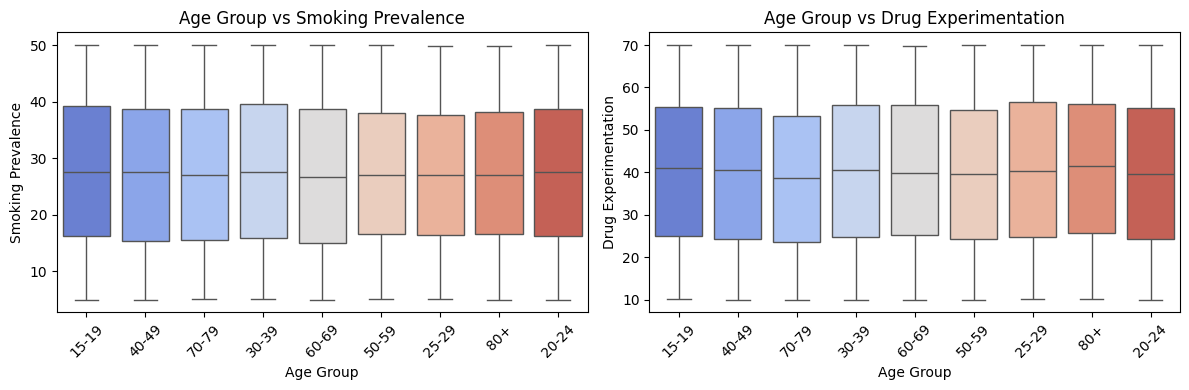

In [ ]:
# Function to plot box plots for two variables side by side
def visualize_boxplots(data, x_column, y_columns, titles, palette='coolwarm'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for ax, y_column, title in zip(axes, y_columns, titles):
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_column.replace('_', ' '))
        ax.set_ylabel(y_column.replace('_', ' '))
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()

# Define columns and titles for visualization
columns_to_plot = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = ['Age Group vs Smoking Prevalence', 'Age Group vs Drug Experimentation']

# Call the function
visualize_boxplots(youth_data, 'Age_Group', columns_to_plot, titles)


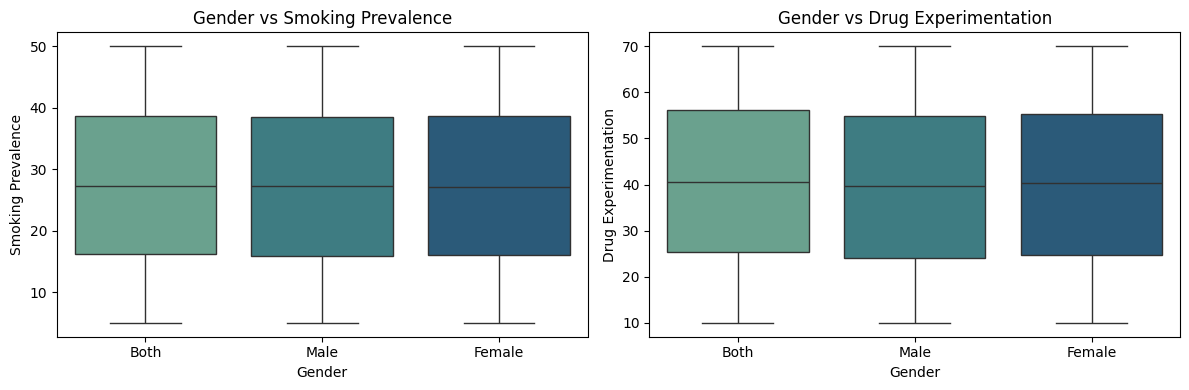

In [ ]:
# Function to plot box plots for Gender vs multiple variables
def visualize_gender_boxplots(data, x_column, y_columns, titles, palette='crest'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for ax, y_column, title in zip(axes, y_columns, titles):
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column.replace('_', ' '))

    plt.tight_layout()
    plt.show()

# Define the variables and their corresponding titles
columns_to_plot = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = ['Gender vs Smoking Prevalence', 'Gender vs Drug Experimentation']

# Call the function
visualize_gender_boxplots(youth_data, 'Gender', columns_to_plot, titles)


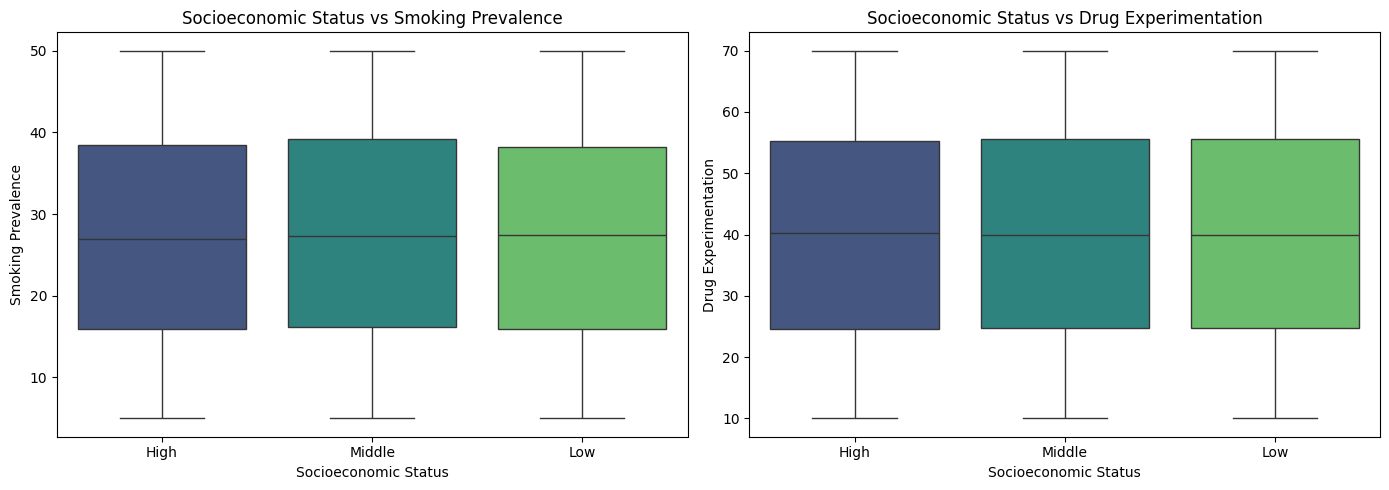

In [ ]:
# Function to plot box plots for Socioeconomic Status vs multiple variables
def visualize_socioeconomic_boxplots(data, x_column, y_columns, titles, palette='viridis'):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    for ax, y_column, title in zip(axes, y_columns, titles):
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_column.replace('_', ' '))
        ax.set_ylabel(y_column.replace('_', ' '))

    plt.tight_layout()
    plt.show()

# Define the variables and their corresponding titles
columns_to_plot = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = [
    'Socioeconomic Status vs Smoking Prevalence',
    'Socioeconomic Status vs Drug Experimentation'
]

# Call the function
visualize_socioeconomic_boxplots(youth_data, 'Socioeconomic_Status', columns_to_plot, titles)


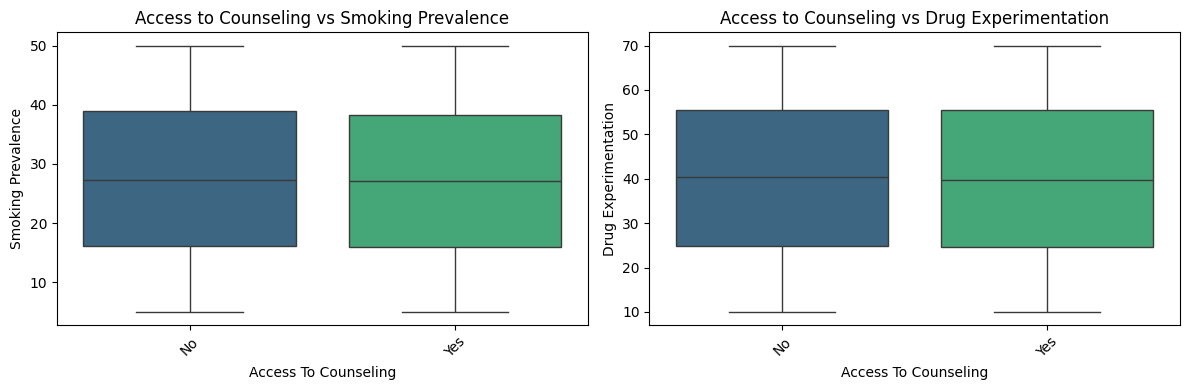

In [ ]:
# Function to analyze the impact of Access to Counseling
def analyze_access_to_counseling(data, x_column, y_columns, titles, palette='viridis'):
    plt.figure(figsize=(12,4))  # Adjusted figure size for clarity

    for i, (y_column, title) in enumerate(zip(y_columns, titles), start=1):
        plt.subplot(1, 2, i)
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette)
        plt.title(title)
        plt.xlabel(x_column.replace('_', ' ').title())
        plt.ylabel(y_column.replace('_', ' ').title())
        plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

    plt.tight_layout()
    plt.show()

# Variables for the analysis
y_columns = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = [
    'Access to Counseling vs Smoking Prevalence',
    'Access to Counseling vs Drug Experimentation'
]

# Call the function
analyze_access_to_counseling(youth_data, 'Access_to_Counseling', y_columns, titles)


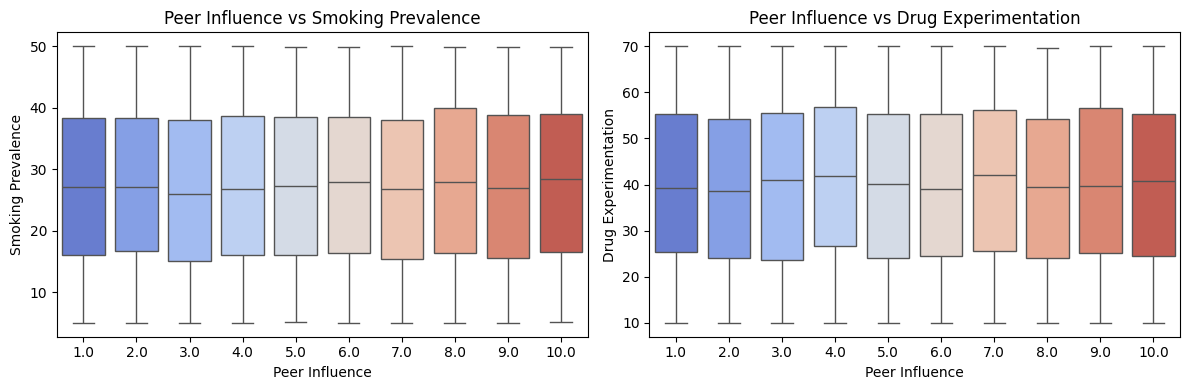

In [ ]:
# Function to analyze Peer Influence using box plots
def analyze_peer_influence(data, x_column, y_columns, titles, palette='coolwarm'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for ax, y_column, title in zip(axes, y_columns, titles):
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_column.replace('_', ' '))
        ax.set_ylabel(y_column.replace('_', ' '))

    plt.tight_layout()
    plt.show()

# Variables and titles for analysis
columns_to_plot = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = [
    'Peer Influence vs Smoking Prevalence',
    'Peer Influence vs Drug Experimentation'
]

# Call the function
analyze_peer_influence(youth_data, 'Peer_Influence', columns_to_plot, titles)


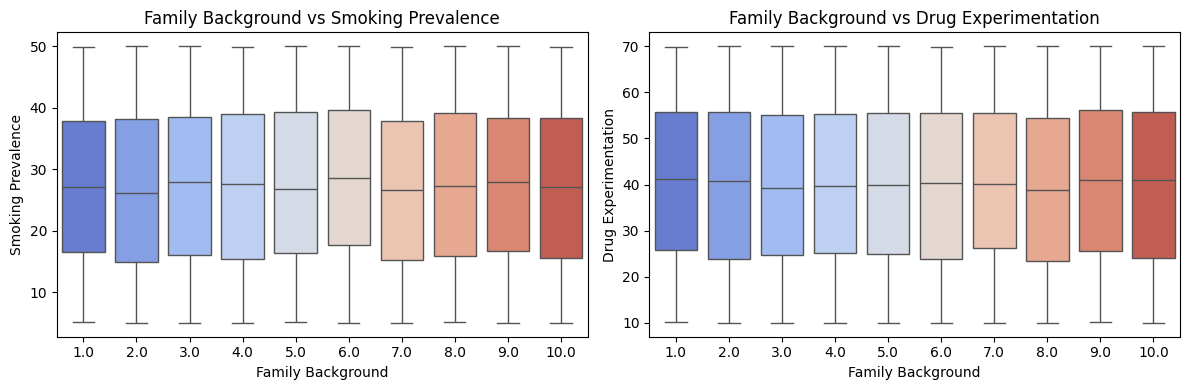

In [ ]:
# Function to analyze Family Background using box plots
def analyze_family_background(data, x_column, y_columns, titles, palette='coolwarm'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for ax, y_column, title in zip(axes, y_columns, titles):
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_column.replace('_', ' '))
        ax.set_ylabel(y_column.replace('_', ' '))

    plt.tight_layout()
    plt.show()

# Variables and titles for analysis
columns_to_plot = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = [
    'Family Background vs Smoking Prevalence',
    'Family Background vs Drug Experimentation'
]

# Call the function
analyze_family_background(youth_data, 'Family_Background', columns_to_plot, titles)


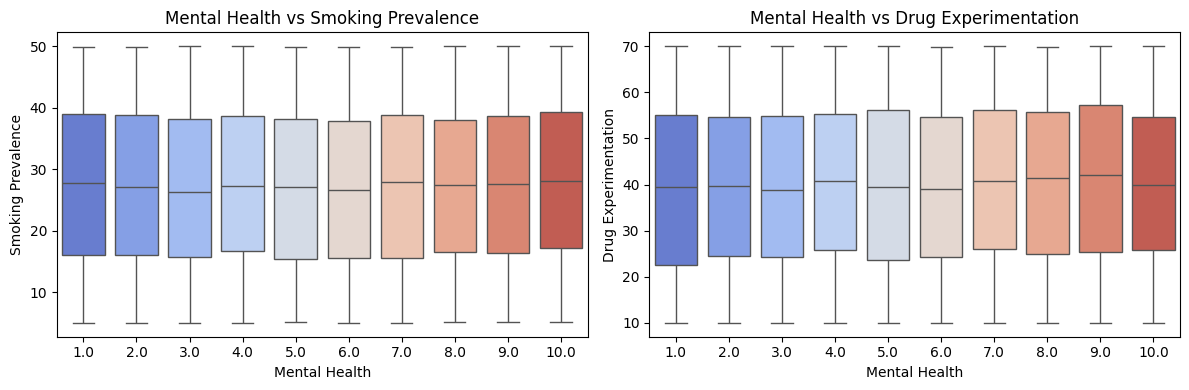

In [ ]:
# Function to analyze Mental Health using box plots
def analyze_mental_health(data, x_column, y_columns, titles, palette='coolwarm'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for ax, y_column, title in zip(axes, y_columns, titles):
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_column.replace('_', ' '))
        ax.set_ylabel(y_column.replace('_', ' '))

    plt.tight_layout()
    plt.show()

# Variables and titles for analysis
columns_to_plot = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = [
    'Mental Health vs Smoking Prevalence',
    'Mental Health vs Drug Experimentation'
]

# Call the function
analyze_mental_health(youth_data, 'Mental_Health', columns_to_plot, titles)


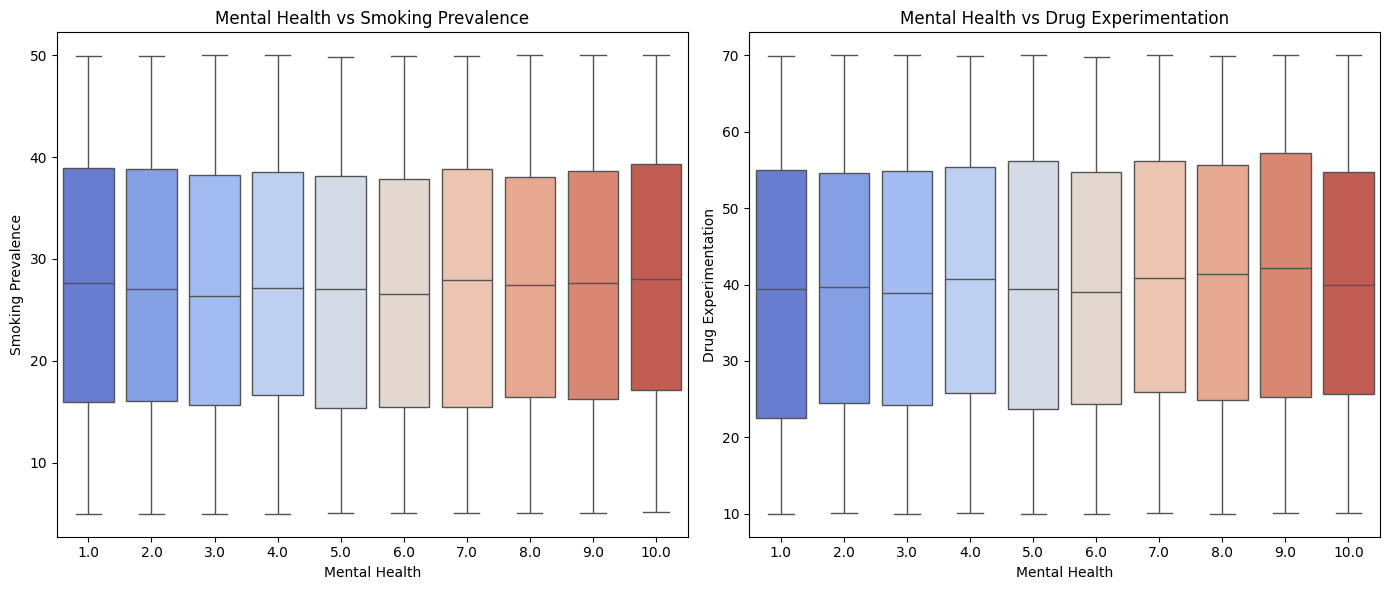

In [ ]:
# Function to analyze Mental Health using box plots for multiple outcomes
def analyze_mental_health(data, x_column, y_columns, titles, palette='coolwarm'):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Loop through each y-column and corresponding title for plotting
    for ax, y_column, title in zip(axes, y_columns, titles):
        sns.boxplot(data=data, x=x_column, y=y_column, palette=palette, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_column.replace('_', ' ').title())  # Improved readability
        ax.set_ylabel(y_column.replace('_', ' ').title())  # Improved readability

    plt.tight_layout()
    plt.show()

# Variables for analysis
columns_to_plot = ['Smoking_Prevalence', 'Drug_Experimentation']
titles = [
    'Mental Health vs Smoking Prevalence',
    'Mental Health vs Drug Experimentation'
]

# Call the function
analyze_mental_health(youth_data, 'Mental_Health', columns_to_plot, titles)


### **Multivariate Analysis**

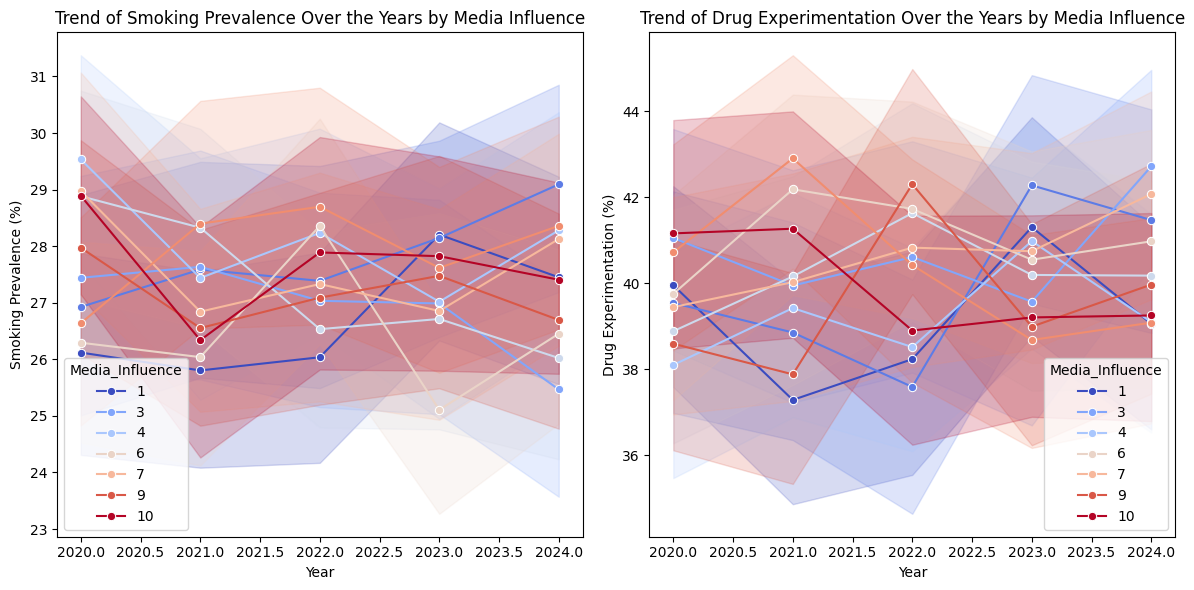

In [ ]:
# Creating line plots to visualize the trend of Smoking Prevalence and Drug Experimentation over the years by influence of media
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=youth_data, x='Year', y='Smoking_Prevalence', hue='Media_Influence', marker='o', palette='coolwarm')
plt.title('Trend of Smoking Prevalence Over the Years by Media Influence')
plt.ylabel('Smoking Prevalence (%)')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
sns.lineplot(data=youth_data, x='Year', y='Drug_Experimentation', hue='Media_Influence', marker='o', palette='coolwarm')
plt.title('Trend of Drug Experimentation Over the Years by Media Influence')
plt.ylabel('Drug Experimentation (%)')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

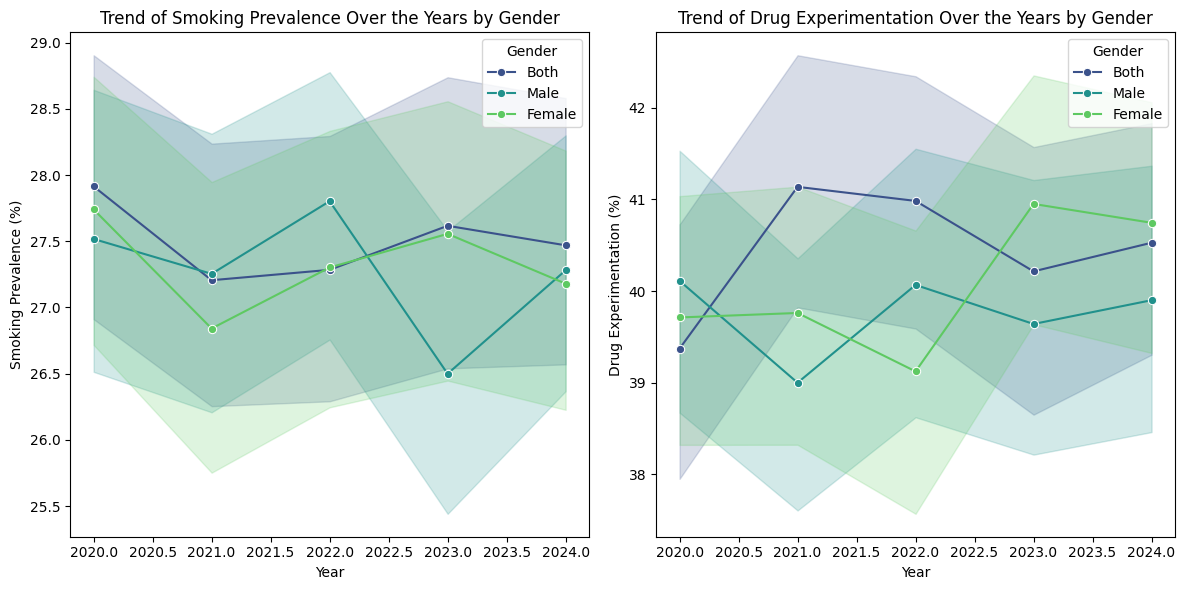

In [ ]:

# Creating line plots to visualize the trend of Smoking Prevalence and Drug Experimentation over the years by Gender
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=youth_data, x='Year', y='Smoking_Prevalence', hue='Gender', marker='o', palette='viridis')
plt.title('Trend of Smoking Prevalence Over the Years by Gender')
plt.ylabel('Smoking Prevalence (%)')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
sns.lineplot(data=youth_data, x='Year', y='Drug_Experimentation', hue='Gender', marker='o', palette='viridis')
plt.title('Trend of Drug Experimentation Over the Years by Gender')
plt.ylabel('Drug Experimentation (%)')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

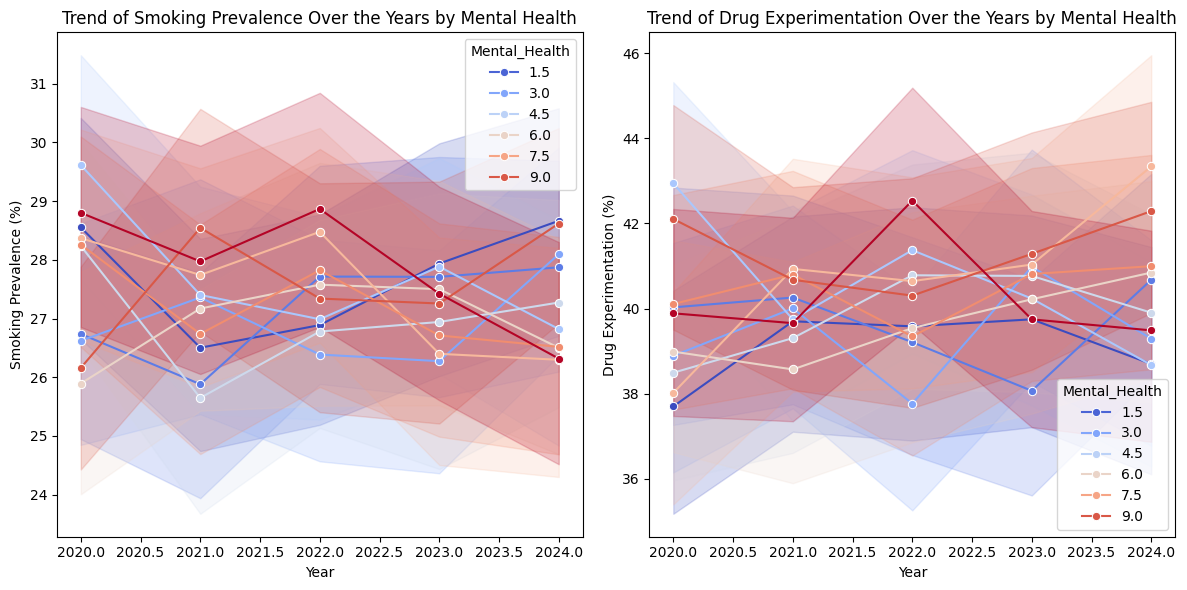

In [ ]:
# Creating line plots to visualize the trend of Smoking Prevalence and Drug Experimentation over the years by Mental Health
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=youth_data, x='Year', y='Smoking_Prevalence', hue='Mental_Health', marker='o', palette='coolwarm')
plt.title('Trend of Smoking Prevalence Over the Years by Mental Health')
plt.ylabel('Smoking Prevalence (%)')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
sns.lineplot(data=youth_data, x='Year', y='Drug_Experimentation', hue='Mental_Health', marker='o', palette='coolwarm')
plt.title('Trend of Drug Experimentation Over the Years by Mental Health')
plt.ylabel('Drug Experimentation (%)')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


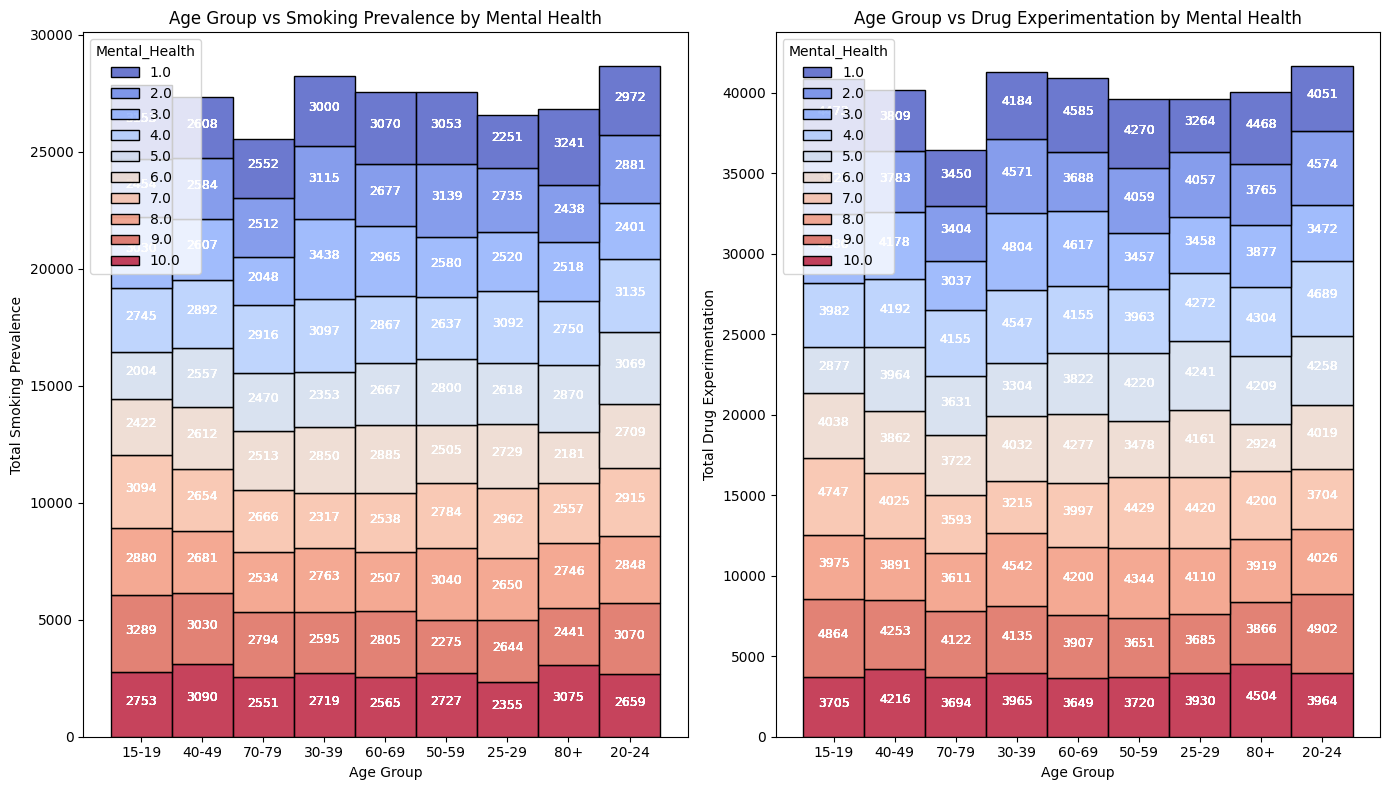

In [ ]:
# Creating stacked bar plots to visualize the relationship of Age Group vs Smoking Prevalence and Drug Experimentation by Mental Health
plt.figure(figsize=(14, 8))

def add_labels(ax, data, category, weight):
    for c in data[category].unique():
        sub_data = data[data[category] == c]
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width() / 2., p.get_y() + height / 2.,
                        f'{int(height)}', ha="center", fontsize=9, color='white')

ax1 = plt.subplot(1, 2, 1)
sns.histplot(data=youth_data, x='Age_Group', hue='Mental_Health', weights='Smoking_Prevalence', multiple='stack', palette='coolwarm', ax=ax1)
plt.title('Age Group vs Smoking Prevalence by Mental Health')
plt.ylabel('Total Smoking Prevalence')
plt.xlabel('Age Group')

add_labels(ax1, youth_data, 'Age_Group', 'Smoking_Prevalence')

ax2 = plt.subplot(1, 2, 2)
sns.histplot(data=youth_data, x='Age_Group', hue='Mental_Health', weights='Drug_Experimentation', multiple='stack', palette='coolwarm', ax=ax2)
plt.title('Age Group vs Drug Experimentation by Mental Health')
plt.ylabel('Total Drug Experimentation')
plt.xlabel('Age Group')

add_labels(ax2, youth_data, 'Age_Group', 'Drug_Experimentation')

plt.tight_layout()
plt.show()

### **Correlation Heatmap**

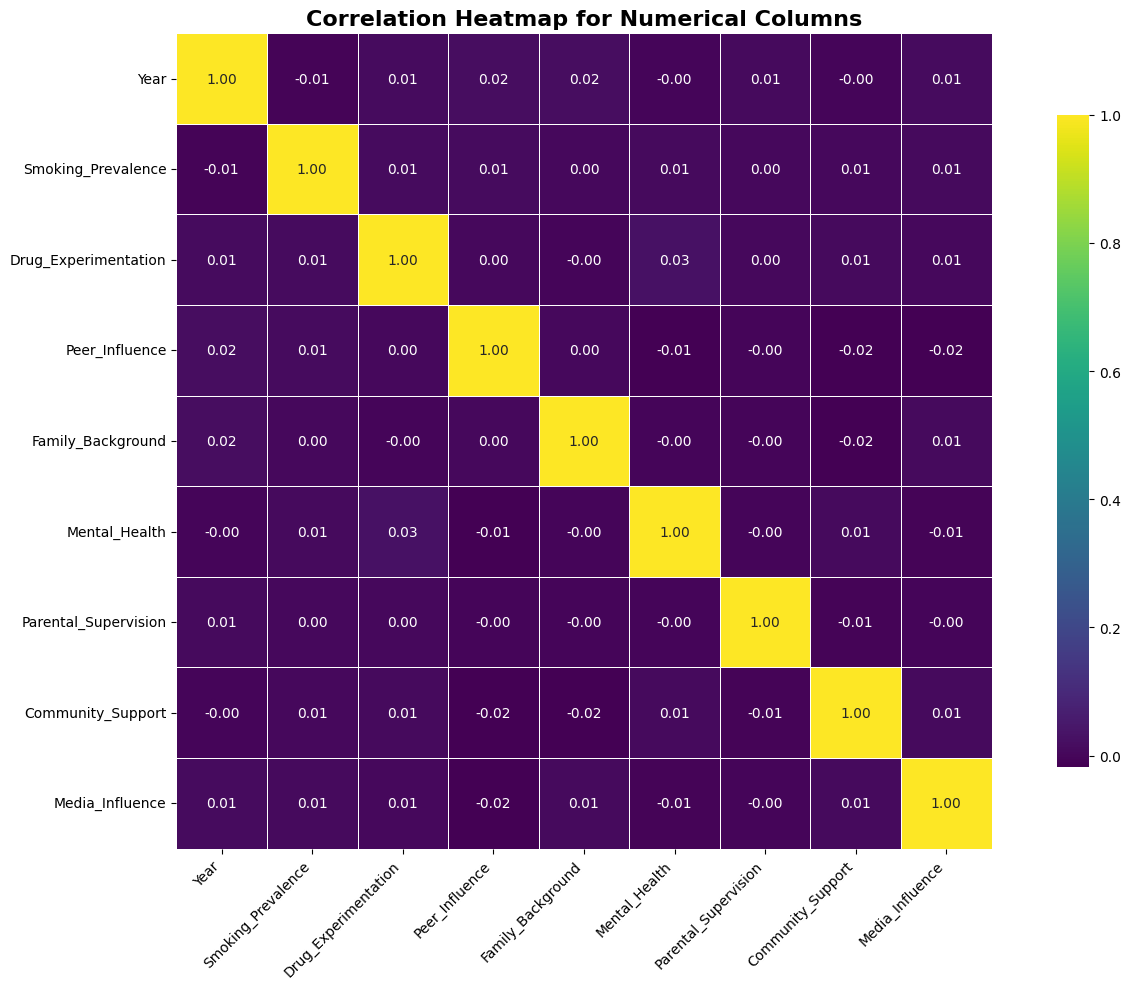

In [ ]:
# Function to plot an enhanced correlation heatmap
def plot_correlation_heatmap(data, title, cmap='viridis', figsize=(14, 10)):
    # Select only numerical columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    corr_matrix = data[numerical_columns].corr()

    # Create the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",  # Display correlation values with 2 decimal places
        cmap=cmap,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},  # Shrink the colorbar
        square=True  # Ensure the heatmap cells are square
    )
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=10)  # Adjust y-axis label size
    plt.tight_layout()
    plt.show()

# Call the function with a title
plot_correlation_heatmap(
    youth_data,
    title='Correlation Heatmap for Numerical Columns'
)


## ***Hypothesis***

## ***Age Group vs Drug Experimentation***

### **Hypothesis 1: Peer Influence Increases Smoking Prevalence.**

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'cleaned_youth_smoking_drug_data.csv'
data = pd.read_csv(file_path)

# Bin Peer Influence into categories for easier comparison
data['Peer_Influence_Bin'] = pd.cut(
    data['Peer_Influence'], bins=[0, 3, 6, 10], labels=["Low", "Medium", "High"]
)

# Create a Box Plot for all data
fig = px.box(
    data,
    x='Peer_Influence_Bin',
    y='Smoking_Prevalence',
    color='Gender',
    points="all",  # Add individual data points
    hover_data=['Age_Group', 'Socioeconomic_Status'],
    title='Impact of Peer Influence on Smoking Prevalence',
    labels={'Peer_Influence_Bin': 'Peer Influence Level'}
)

# Add buttons for Age Group selection
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=True,
            buttons=[
                dict(
                    label="15-19",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '15-19']['Peer_Influence_Bin']],
                           "y": [data[data['Age_Group'] == '15-19']['Smoking_Prevalence']],
                           "color": [data[data['Age_Group'] == '15-19']['Gender']]},
                          {"title": "Impact of Peer Influence on Smoking Prevalence (Age Group: 15-19)"}]
                ),
                dict(
                    label="20-24",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '20-24']['Peer_Influence_Bin']],
                           "y": [data[data['Age_Group'] == '20-24']['Smoking_Prevalence']],
                           "color": [data[data['Age_Group'] == '20-24']['Gender']]},
                          {"title": "Impact of Peer Influence on Smoking Prevalence (Age Group: 20-24)"}]
                ),
                dict(
                    label="25-29",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '25-29']['Peer_Influence_Bin']],
                           "y": [data[data['Age_Group'] == '25-29']['Smoking_Prevalence']],
                           "color": [data[data['Age_Group'] == '25-29']['Gender']]},
                          {"title": "Impact of Peer Influence on Smoking Prevalence (Age Group: 25-29)"}]
                ),
                dict(
                    label="30-39",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '30-39']['Peer_Influence_Bin']],
                           "y": [data[data['Age_Group'] == '30-39']['Smoking_Prevalence']],
                           "color": [data[data['Age_Group'] == '30-39']['Gender']]},
                          {"title": "Impact of Peer Influence on Smoking Prevalence (Age Group: 30-39)"}]
                ),
                dict(
                    label="40-49",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '40-49']['Peer_Influence_Bin']],
                           "y": [data[data['Age_Group'] == '40-49']['Smoking_Prevalence']],
                           "color": [data[data['Age_Group'] == '40-49']['Gender']]},
                          {"title": "Impact of Peer Influence on Smoking Prevalence (Age Group: 40-49)"}]
                ),
            ],
            direction="down",
        )
    ],
    template="plotly_white",
)

# Show the plot
fig.show()


### **Hypothesis 2: Socioeconomic Status Correlates with Drug Experimentation**

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'cleaned_youth_smoking_drug_data.csv'
data = pd.read_csv(file_path)

# Create a Violin Plot for Socioeconomic Status and Drug Experimentation
fig = px.violin(
    data,
    x='Socioeconomic_Status',
    y='Drug_Experimentation',
    color='Gender',
    box=True,  # Add a box plot inside the violin for median and quartiles
    points="all",  # Show all data points
    hover_data=['Age_Group'],
    title='Impact of Socioeconomic Status on Drug Experimentation',
    labels={'Socioeconomic_Status': 'Socioeconomic Status', 'Drug_Experimentation': 'Drug Experimentation'},
)

# Add buttons for Age Group selection
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=True,
            buttons=[
                dict(
                    label="15-19",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '15-19']['Socioeconomic_Status']],
                           "y": [data[data['Age_Group'] == '15-19']['Drug_Experimentation']],
                           "color": [data[data['Age_Group'] == '15-19']['Gender']]},
                          {"title": "Impact of Socioeconomic Status on Drug Experimentation (Age Group: 15-19)"}]
                ),
                dict(
                    label="20-24",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '20-24']['Socioeconomic_Status']],
                           "y": [data[data['Age_Group'] == '20-24']['Drug_Experimentation']],
                           "color": [data[data['Age_Group'] == '20-24']['Gender']]},
                          {"title": "Impact of Socioeconomic Status on Drug Experimentation (Age Group: 20-24)"}]
                ),
                dict(
                    label="25-29",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '25-29']['Socioeconomic_Status']],
                           "y": [data[data['Age_Group'] == '25-29']['Drug_Experimentation']],
                           "color": [data[data['Age_Group'] == '25-29']['Gender']]},
                          {"title": "Impact of Socioeconomic Status on Drug Experimentation (Age Group: 25-29)"}]
                ),
                dict(
                    label="30-39",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '30-39']['Socioeconomic_Status']],
                           "y": [data[data['Age_Group'] == '30-39']['Drug_Experimentation']],
                           "color": [data[data['Age_Group'] == '30-39']['Gender']]},
                          {"title": "Impact of Socioeconomic Status on Drug Experimentation (Age Group: 30-39)"}]
                ),
                dict(
                    label="40-49",
                    method="update",
                    args=[{"x": [data[data['Age_Group'] == '40-49']['Socioeconomic_Status']],
                           "y": [data[data['Age_Group'] == '40-49']['Drug_Experimentation']],
                           "color": [data[data['Age_Group'] == '40-49']['Gender']]},
                          {"title": "Impact of Socioeconomic Status on Drug Experimentation (Age Group: 40-49)"}]
                ),
            ],
            direction="down",
        )
    ],
    template="plotly_white",
)

# Show the plot
fig.show()


### **Hypothesis 3: Peer Influence vs Smoking Prevalence**

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'cleaned_youth_smoking_drug_data.csv'
data = pd.read_csv(file_path)

# Group data by Media Influence and Age Group to calculate average Drug Experimentation
grouped_data = data.groupby(['Media_Influence', 'Age_Group'])['Drug_Experimentation'].mean().reset_index()

# Create a Clustered Bar Chart
fig = px.bar(
    grouped_data,
    x='Media_Influence',
    y='Drug_Experimentation',
    color='Age_Group',
    barmode='group',  # Group bars together
    hover_data={
        'Media_Influence': True,  # Show Media Influence
        'Drug_Experimentation': True,  # Show Drug Experimentation
        'Age_Group': True,  # Show Age Group
    },
    title='Impact of Peer Influence on Drug Experimentation',
    labels={'Drug_Experimentation': 'Average Drug Experimentation (%)'}
)

# Add interactivity elements
fig.update_layout(
    xaxis_title="Peer Influence",
    yaxis_title="Average Drug Experimentation (%)",
    template="plotly_white",

    # Hover effect for tooltips
    hovermode="x unified",  # Shows all data points when hovering over bars

    # Legend options to toggle Age Groups
    showlegend=True,
)

# Show the plot
fig.show()


### **Hypthesis 4: The Relationship Between Age Group and Drug Experimentation Over Time**

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'cleaned_youth_smoking_drug_data.csv'
data = pd.read_csv(file_path)

# Group data by Year and Age Group to calculate average Drug Experimentation
grouped_data = data.groupby(['Year', 'Age_Group'])['Drug_Experimentation'].mean().reset_index()

# Create a Line Chart to visualize the relationship
fig = px.line(
    grouped_data,
    x='Year',  # Time dimension (e.g., Year)
    y='Drug_Experimentation',  # Drug Experimentation rate
    color='Age_Group',  # Different lines for each Age Group
    title='The Relationship Between Age Group and Drug Experimentation Over Time',
    labels={'Drug_Experimentation': 'Average Drug Experimentation (%)', 'Year': 'Year'},
    markers=True  # Adds markers to each data point
)

# Add hover interactivity to show details on hover
fig.update_traces(hoverinfo='x+y+name')

# Show the plot
fig.show()
